# Test validity step 1 : $P(\eta | ...) \propto \eta^t (S_{approx} + E^t (B^t N^{-1} B)^{-1} E) \eta$

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.io.fits as fits
import scipy
import camb

import micmac as micmac

In [2]:
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('')))+'/tutorials/')
from func_tools_for_tests import *
from get_freq_maps_SO_64 import *
# from get_freq_maps_LiteBIRD_64 import *
# freq_maps is defined there

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Shape for input frequency maps : (6, 2, 49152)
Shape for input cmb maps : (6, 2, 49152)


In [3]:
instrument

,frequency,depth_p,depth_i,fwhm,f_sky,status,reference,type,note,experiment
0,27.0,49.5,35.0,91.0,0.1,forecast,Journal of Cosmology and Astroparticle Physics...,ground,depth_p is simply depth_i * sqrt(2),SO_SAT
1,39.0,29.7,21.0,63.0,0.1,forecast,Journal of Cosmology and Astroparticle Physics...,ground,depth_p is simply depth_i * sqrt(2),SO_SAT
2,93.0,3.7,2.6,30.0,0.1,forecast,Journal of Cosmology and Astroparticle Physics...,ground,depth_p is simply depth_i * sqrt(2),SO_SAT
3,145.0,4.7,3.3,17.0,0.1,forecast,Journal of Cosmology and Astroparticle Physics...,ground,depth_p is simply depth_i * sqrt(2),SO_SAT
4,225.0,8.9,6.3,11.0,0.1,forecast,Journal of Cosmology and Astroparticle Physics...,ground,depth_p is simply depth_i * sqrt(2),SO_SAT
5,280.0,22.6,16.0,9.0,0.1,forecast,Journal of Cosmology and Astroparticle Physics...,ground,depth_p is simply depth_i * sqrt(2),SO_SAT


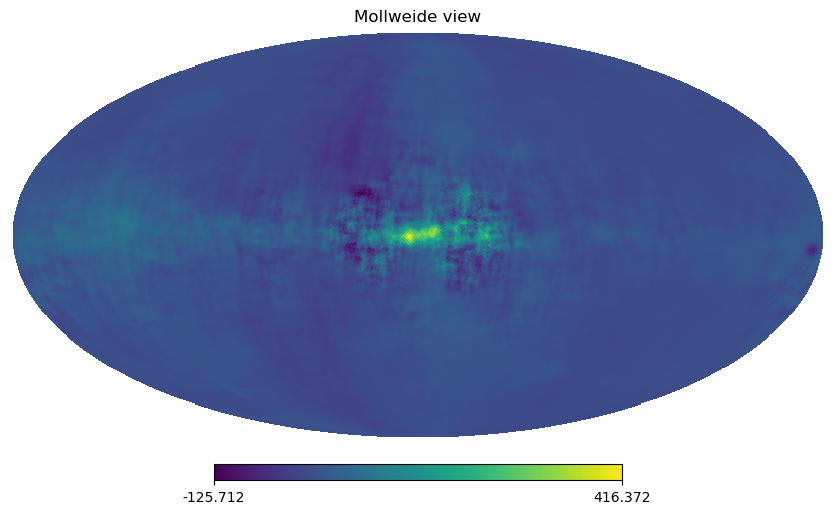

In [4]:
hp.mollview(freq_maps[0,0]) # Freq, nstokes, npix

In [5]:
r_true = 0

# Getting the parameters of the problem
nstokes = 2
nside = 64
lmax = nside*2
lmin = 2

pos_special_freqs = [0,-1]

number_frequencies = freq_maps.shape[0]
number_components = 3

limit_iter_cg=2000
# limit_iter_cg=1500
tolerance_CG=10**(-12)
# tolerance_CG=10**(-8)

n_iter = 8
number_correlations = int(np.ceil(nstokes**2/2) + np.floor(nstokes/2))

npix = 12*nside**2

freq_inverse_noise = micmac.get_noise_covar(instrument['depth_p'], nside)

sample_r_Metropolis=True
sample_C_inv_Wishart=False

n_walkers = 1
num_warmup = 0
fullsky_ver = True
slow_ver = False

only_select_Bmodes = False
no_Emodes_CMB = False

sample_eta_B_f = True

Sampling_obj = micmac.Sampling_functions(nside, lmax, nstokes, np.array(instrument['frequency']), freq_inverse_noise, pos_special_freqs=pos_special_freqs,
                 number_components=number_components, lmin=lmin,
                 n_iter=n_iter, limit_iter_cg=limit_iter_cg, tolerance_CG=tolerance_CG)


# Re-Defining the data if needed
indices_polar = np.array([1,2,4])
partial_indices_polar = indices_polar[:nstokes]


input_freq_maps, theoretical_red_cov_r0_total, theoretical_red_cov_r1_tensor = Full_Gibbs_Sampler.generate_input_freq_maps_from_fgs(freq_maps_fgs, return_only_freq_maps=False)



theoretical_r0_total = micmac.get_c_ells_from_red_covariance_matrix(theoretical_red_cov_r0_total)#[partial_indices_polar,:]
theoretical_r1_tensor = micmac.get_c_ells_from_red_covariance_matrix(theoretical_red_cov_r1_tensor)#[partial_indices_polar,:]


c_ell_approx = np.zeros((3,lmax+1))
c_ell_approx[0,lmin:] = theoretical_r0_total[0,:]
c_ell_approx[1,lmin:] = theoretical_r0_total[1,:]

# Params mixing matrix
init_mixing_matrix_obj = micmac.InitMixingMatrix(np.array(instrument['frequency']), number_components, pos_special_freqs=pos_special_freqs)
exact_params_mixing_matrix = init_mixing_matrix_obj.init_params()

# First guesses
# initial_wiener_filter_term = np.zeros((nstokes, npix))
# initial_fluctuation_maps = np.zeros((nstokes, npix))

# CMB_covariance = np.zeros_like(c_ell_approx)
# CMB_covariance[:,lmin:] = (theoretical_r0_total + r_true*theoretical_r1_tensor)


Calculating spectra from CAMB !
Calculating spectra from CAMB !


In [6]:
theoretical_red_cov_r0_total

array([[[3.34930124e-02, 0.00000000e+00],
        [0.00000000e+00, 1.28946108e-06]],

       [[2.31020582e-02, 0.00000000e+00],
        [0.00000000e+00, 1.33532908e-06]],

       [[1.30006661e-02, 0.00000000e+00],
        [0.00000000e+00, 1.28634010e-06]],

       [[6.28940731e-03, 0.00000000e+00],
        [0.00000000e+00, 1.33344279e-06]],

       [[2.69836243e-03, 0.00000000e+00],
        [0.00000000e+00, 1.28550792e-06]],

       [[1.10568851e-03, 0.00000000e+00],
        [0.00000000e+00, 1.33333499e-06]],

       [[5.13275058e-04, 0.00000000e+00],
        [0.00000000e+00, 1.28583334e-06]],

       [[3.10318995e-04, 0.00000000e+00],
        [0.00000000e+00, 1.33393970e-06]],

       [[2.20880124e-04, 0.00000000e+00],
        [0.00000000e+00, 1.28663620e-06]],

       [[1.59711316e-04, 0.00000000e+00],
        [0.00000000e+00, 1.33491682e-06]],

       [[1.15702026e-04, 0.00000000e+00],
        [0.00000000e+00, 1.28775943e-06]],

       [[8.93535541e-05, 0.00000000e+00],
        [0.0

In [7]:
# all_spectra = generate_power_spectra_CAMB(nside*2, typeless_bool=True)
# lensing_spectra = all_spectra['lensed_scalar'][:lmax+1,:]
# camb_cls = all_spectra['total'][:lmax+1,:]

# c_ell_approx = np.zeros((6,lmax+1))
# c_ell_approx[1] = camb_cls.T[1]
# c_ell_approx[2] = lensing_spectra.T[2]


In [8]:
indices_polar = np.array([1,2,4])

# if nstokes == 2:    
#     # c_ells_input = c_ells_input[indices_polar,:]
#     c_ell_approx = c_ell_approx[indices_polar,:]
#     # CMB_map_input = CMB_map_input[1:,:]
#     # freq_maps = freq_maps[:,1:,:]

In [9]:
red_cov_approx_matrix = micmac.get_reduced_matrix_from_c_ell(c_ell_approx)[lmin:,...]

In [10]:
# mixing_matrix_init = np.array([[1.,         1.,         0.        ],
#                                 [1.,         0.52387813, 0.00182426],
#                                 [1.,         0.3117258,  0.00324908],
#                                 [1.,         0.21971687, 0.00433627],
#                                 [1.,         0.15096497, 0.0057459 ],
#                                 [1.,         0.10631274, 0.0074421 ],
#                                 [1.,         0.07881344, 0.00935487],
#                                 [1.,         0.05159725, 0.0133358 ],
#                                 [1.,         0.03585547, 0.01906532],
#                                 [1.,         0.02552178, 0.02888587],
#                                 [1.,         0.0193825,  0.04508262],
#                                 [1.,         0.01493871, 0.08217483],
#                                 [1.,         0.01211497, 0.16061503],
#                                 [1.,         0.00871575, 0.37616284],
#                                 [1.,         0.,         1.        ]])

In [11]:
# init_mixing_matrix_obj.init_params()

In [12]:
depth_p = instrument['depth_p']

freq_inverse_noise = micmac.get_noise_covar(depth_p, nside)

init_mixing_matrix_obj = micmac.InitMixingMatrix(np.array(instrument['frequency']), number_components, pos_special_freqs=[0,-1])
init_params = init_mixing_matrix_obj.init_params()
# init_params = mixing_matrix_init[1:,1:-1]

mixing_matrix_obj = micmac.MixingMatrix(instrument['frequency'], number_components, init_params, pos_special_freqs=[0,-1])

mixing_matrix_sampled = mixing_matrix_obj.get_B()

BtinvNB = micmac.get_inv_BtinvNB(freq_inverse_noise, mixing_matrix_sampled)
BtinvN_sqrt = micmac.get_BtinvN(np.sqrt(freq_inverse_noise), mixing_matrix_sampled)

In [13]:
red_cov_approx_matrix.shape

(127, 2, 2)

In [14]:

# eta_maps = np.zeros((number_frequencies, nstokes, npix))
eta_maps = np.zeros((nstokes, npix))
map_random_x = []
map_random_y = []
# eta_maps = micmac.get_sampling_eta(param_dict, red_cov_approx_matrix, BtinvNB, BtinvN_sqrt, map_random_x=map_random_x, map_random_y=map_random_y, initial_guess=np.copy(eta_maps), lmin=lmin, n_iter=n_iter, limit_iter_cg=limit_iter_cg, tolerance=tolerance_CG)
eta_maps = micmac.get_sampling_eta_v2(param_dict, red_cov_approx_matrix, BtinvNB, BtinvN_sqrt, map_random_x=map_random_x, map_random_y=map_random_y, lmin=lmin, n_iter=n_iter)



Recalculating x !
Recalculating y !


In [15]:
eta_maps_extended = np.vstack([np.zeros_like(eta_maps[0]), eta_maps])
c_ells_eta = hp.anafast(eta_maps_extended, lmax=lmax, iter=n_iter)[indices_polar,lmin:]

In [16]:
covariance_noise = np.zeros_like(c_ell_approx)
# covariance_noise[:nstokes,lmin:] = scipy.linalg.sqrtm(BtinvNB)[0,0]*np.ones_like(c_ell_approx)[:nstokes,lmin:]
covariance_noise[:nstokes,lmin:] = BtinvNB[0,0]*np.ones_like(c_ell_approx)[:nstokes,lmin:]
analytical_eta_term = (c_ell_approx + covariance_noise)/np.sqrt(BtinvNB[0,0])

red_cov_approx_matrix_msqrt = np.linalg.pinv(micmac.get_sqrt_reduced_matrix_from_matrix(red_cov_approx_matrix))
red_cov_approx_matrix_sqrt = micmac.get_sqrt_reduced_matrix_from_matrix(red_cov_approx_matrix)

analytical_eta_term_cov = np.einsum('lij,ljk,lkm->lim', red_cov_approx_matrix_sqrt, np.linalg.pinv(red_cov_approx_matrix) + np.eye(nstokes)/BtinvNB[0,0], red_cov_approx_matrix_sqrt)
analytical_eta_term_2 = np.zeros_like(c_ell_approx)
analytical_eta_term_2[:,lmin:] = micmac.get_c_ells_from_red_covariance_matrix(analytical_eta_term_cov)


ell_arange = np.arange(c_ell_approx.shape[1]) + lmin

In [17]:
number_correl_to_plot = int(np.ceil(nstokes**2/2) + np.floor(nstokes/2))

if nstokes == 3:
    number_subplots_convention = 421
    figsize = (10,10)
    figsize_big = (12,12)
    position_legend = int(number_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)
elif nstokes == 2:
    number_subplots_convention = 131
    figsize = (14,6)
    figsize_big = figsize
    position_legend = number_correl_to_plot-1
    bbox_to_anchor=(1, 1)
else:
    number_subplots_convention = 111
    figsize = (10,10)
    figsize_big = (10,10)
    position_legend = int(number_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)

/Users/mag/miniconda3/envs/non_param_silver/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  fig.canvas.print_figure(bytes_io, **kw)


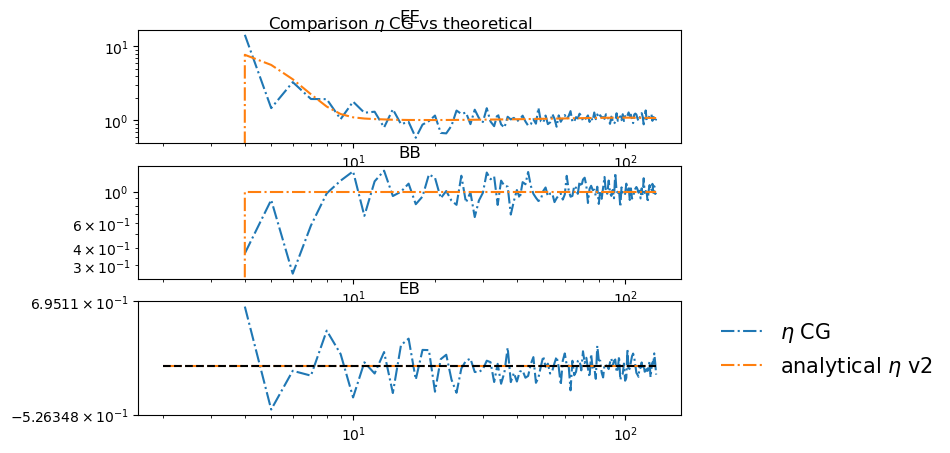

In [18]:
# list_correl = ['TT', 'EE', 'BB', 'TE', 'EB', 'TB']
list_correl = ['EE', 'BB', 'EB']


plt.figure(figsize=(7,5))
plt.suptitle(r"Comparison $\eta$ CG vs theoretical", y=0.91)

for j in range(number_correl_to_plot):
    ax = plt.subplot(311+j)
    plt.title(list_correl[j])

    # plt.plot(ell_arange, c_ell_approx.T[:,j], label='c_ell_approx')
    plt.plot(ell_arange[lmin:], c_ells_eta[j,:], '-.', label=r"$\eta$ CG")
    
    # plt.plot(ell_arange, analytical_eta_term[j,:], '-.', label=r"analytical $\eta$")
    plt.plot(ell_arange, analytical_eta_term_2[j,:], '-.', label=r"analytical $\eta$ v2")
    
    # if j < nstokes:
    #     plt.plot([ell_arange[0], ell_arange[-1]], [1,1], '--', color='black')
    # plt.plot([ell_arange[0], ell_arange[-1]], [0,0], '--', color='black')
    if nstokes == 3 and j < number_correl_to_plot-2:
        plt.xticks(color='w')

    if j <= nstokes-1:
        plt.loglog()
        # plt.ylim(ymin=noise_level/10.)
    else:
        plt.xscale('log')
        plt.yscale('symlog')
    # plt.legend()
    if j == position_legend:
        plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)
        plt.plot([ell_arange[0], ell_arange[-1]], [0,0], '--', color='black')


plt.show()